In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Obtenção dos dados

In [6]:
dados_treino = pd.read_csv('train.csv')
dados_teste = pd.read_csv('test.csv')

In [7]:
dados_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
dados_treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# porcentagem de dados faltantes em cada coluna

(dados_treino.isnull().sum() / dados_treino.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

## Gráfico de sobreviventes em relação ao sexo, classe e porto de embarque:

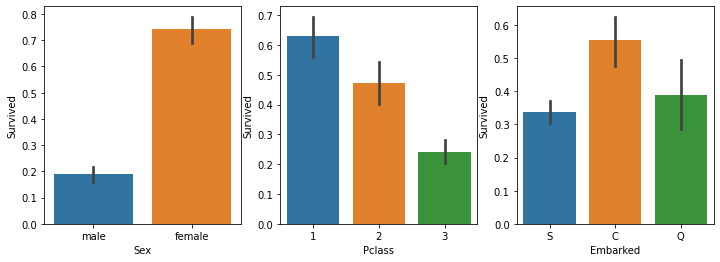

In [12]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=dados_treino, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=dados_treino, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=dados_treino, ax=axis3);

## Gráfico de sobreviventes em relação a  (siblings / spouses) e (parents / children)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

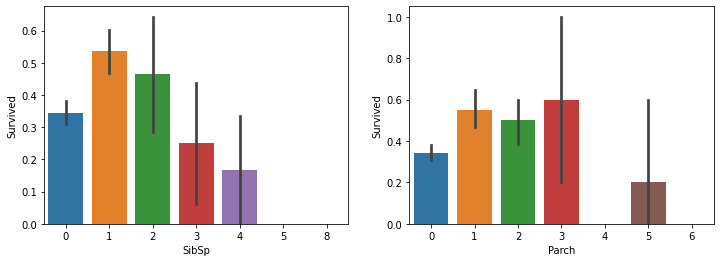

In [13]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(12,4))

sns.barplot(x='SibSp', y='Survived', data=dados_treino, ax=axis1)
sns.barplot(x='Parch', y='Survived', data=dados_treino, ax=axis2)

# Gráficos de sobreviventes e mortos em relação a idade

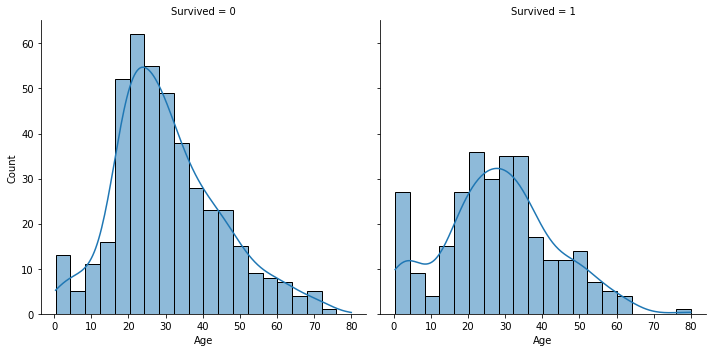

In [14]:
sns.displot(data=dados_treino, x='Age', kde=True, col='Survived' )

## Estatística descritiva em colunas não numéricas:

In [15]:
dados_treino.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Thorne, Mrs. Gertrude Maybelle",male,347082,G6,S
freq,1,577,7,4,644


In [16]:
dados_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Processo de concatenção dos datasetes de treino e teste para melhor manipulação dos dados

In [17]:
# salvando os índices dos datasets para recuperação posterior

train_idx = dados_treino.shape[0]
test_idx = dados_teste.shape[0]

In [18]:
# salvando PassengerId para posterior submissao ao Kaggle
passengerId = dados_teste['PassengerId']

In [19]:
# extraindo coluna 'Survived' e excluindo ela do dataset treino
target = dados_treino.Survived.copy()
dados_treino.drop(['Survived'], axis=1, inplace=True)

In [20]:
# concatenando treino e teste em um único DataFrame
df_merged = pd.concat(objs=[dados_treino, dados_teste], axis=0).reset_index(drop=True)

print(f"df_merged.shape: ({df_merged.shape[0]} x {df_merged.shape[1]})")

df_merged.shape: (1309 x 11)


In [21]:
df_merged.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# exluindo colunas que não serão usadas como features
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

## Verificando e preenchendo missing values

In [23]:
# verificando quais colunas possuem missing values:
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [24]:
# Preenchendo a coluna embarked com valores que possuem maior frequência
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

In [25]:
# Preenchendo a coluna age com a média das idades
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# Preenchendo a coluna fare com a média dos preços:
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)


In [26]:
df_merged.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


## Preparando features não binárias para implementação do modelo

In [27]:
# convertendo 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

In [28]:
# convertendo a coluna 'Embarked em dummie variables
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

In [29]:
df_merged

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,28.0,0,0,8.0500,0,0,0,1
1305,1,1,39.0,0,0,108.9000,0,1,0,0
1306,3,0,38.5,0,0,7.2500,0,0,0,1
1307,3,0,28.0,0,0,8.0500,0,0,0,1


## Recuperando datasets de treino e teste

In [30]:
treino = df_merged.iloc[:train_idx]
teste = df_merged.iloc[train_idx:]

In [31]:
treino.shape

(891, 10)

In [32]:
teste.shape

(418, 10)

In [33]:
target.shape

(891,)

## Fazendo predição com modelo de Machile Learning

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                 max_depth=1, random_state=0).fit(treino, target)

In [36]:
clf.score(treino, target)

0.8552188552188552

In [37]:
gbc = clf.predict(teste)

In [38]:
gbc

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Gerando arquivo para submissão ao Kaggle

In [39]:
submission_GBC= pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": gbc
})

In [40]:
#submission_GBC.to_csv('./submission__GBC.csv', index=False)

## Comparação de score entre a gender_submission e a submissão utilizando GradientBoostingClassifier no Kaggle

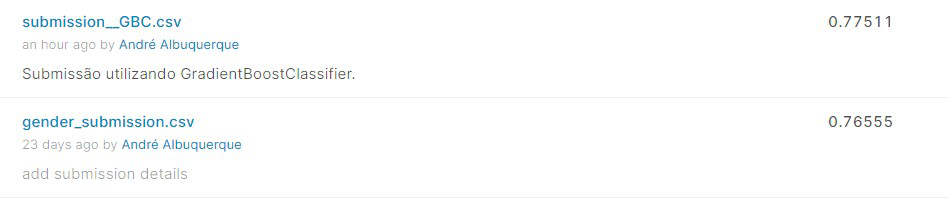

In [41]:
from IPython.display import display
from PIL import Image


path="Score_Titanic_Kaggle.jpg"
display(Image.open(path))